# Trabajando Columnas (Series) en Pandas

El siguiente trabajo, muestra las opciones que se pueden realizar con los diccionarios de datos que se obtienen de un archivo.

In [1]:
#libreria pandas: http://pandas.pydata.org
import pandas as pd
print('Pandas version: ' + pd.__version__)

Pandas version: 0.22.0


In [2]:
print(pd.__version__)

0.22.0


Cómo leemos un archivo csv en pandas?

In [3]:
hitosChile = pd.read_csv('HitosChile.csv', sep=';')

Cómo es el archivo?

In [4]:
hitosChile.head(2)

,Sección,Hito,Tipo,Fecha de erección,Latitud aprox,Longitud aprox,Cota del suelo aprox (metros),Datum,Región,Provincia,Comuna,Observaciones
0,I,I,"Hierro, pirámide de base cuadrada, de 5,4 m. d...",2 de febrero de 1894,"52° 39' 32"" S","68°36' 28"" O","55,2",Pilar Astronómico Hito XVIII.,De Magallanes y Antártica Chilena.,Tierra del Fuego.,Primavera.,El hito se encuentra ubicado en el Cabo Espíri...
1,I,II,"Hierro, pirámide de base cuadrada, de 5,0 m. d...",19 de febrero de 1894,52° 44' 49'' S,"68° 36' 28"" O","112,1",Pilar Astronómico Hito XVIII.,De Magallanes y Antártica Chilena.,Tierra del Fuego.,Primavera.,El hito se encuentra ubicado aproximadamente a...


In [5]:
hitosChile.sample(2)

,Sección,Hito,Tipo,Fecha de erección,Latitud aprox,Longitud aprox,Cota del suelo aprox (metros),Datum,Región,Provincia,Comuna,Observaciones
53,II,XXIV,"Hierro, pirámide de sección cuadrangular, de 5...",5 de abril de 1898.,52° 00' 00'' S,"70° 33' 10"" O","193,0",Punto Astronómico Hito XXII.,De Magallanes y Antártica Chilena.,Magallanes.,San Gregorio.,El Hito II-XXIV se encuentra al norte del Estr...
169,VI,9,"Hierro, pirámide de sección triangular de 2,8 ...",16 de febrero de 1943.,"45° 31' 22"" S","71° 33' 23"" O","794,6",Extremo Este Base Valle Huemules,Aysén del General Carlos Ibáñez del Campo.,Coyhaique.,Coyhaique.,El Hito VI-9 se encuentra en el divortium aqua...


In [6]:
hitosChile.describe()

,Sección,Hito,Tipo,Fecha de erección,Latitud aprox,Longitud aprox,Cota del suelo aprox (metros),Datum,Región,Provincia,Comuna,Observaciones
count,283,283,283,283,283,283,282,283,283,283,283,282
unique,7,209,70,185,266,260,274,15,6,13,22,280
top,VI,3,Hierro,15 de abril de 1896.,51° 59' 59'' S,"68° 36' 28"" O",431,Extremo Sur Base Lago General Paz,De Magallanes y Antártica Chilena.,Coyhaique.,Lago Verde,El hito fue erigido por los Delegados de Chile...
freq,74,5,65,13,13,7,2,81,109,51,37,2


**count**: Nos damos cuenta, que no todas las columnas tienen la misma cantidad de datos, entonces algunas filas, tienen una columna vacia/nula/blanca

**unique**: Al contar la cantidad de datos unicos, nos da cuenta de los elementos disponibles, por ejemplo 6 regiones. Aunque probablemente, algunas se repitan, pero si hay una diferencia de un caracter, cuentan como distintas.

Por tanto, nos damos cuenta que hay que hacer una limpieza previa (ETL, por ejemplo)

**top**: Los datos que más aparecen

**frecuencia**: Cantidad de veces que aparecen los datos más repetidos

In [7]:
#Tipos de datos en la tabla
hitosChile.dtypes

Sección                          object
Hito                             object
Tipo                             object
Fecha de erección                object
Latitud aprox                    object
Longitud aprox                   object
Cota del suelo aprox (metros)    object
Datum                            object
Región                           object
Provincia                        object
Comuna                           object
Observaciones                    object
dtype: object

In [8]:
hitosChile.columns

Index(['Sección', 'Hito', 'Tipo', 'Fecha de erección', 'Latitud aprox',
       'Longitud aprox', 'Cota del suelo aprox (metros)', 'Datum', 'Región',
       'Provincia', 'Comuna', 'Observaciones'],
      dtype='object')

In [9]:
hitosChile.columns = ['Seccion', 'Hito', 'Tipo', 'FechaEreccion', 'LatitudAprox',
       'LongitudAprox', 'CotaSueloAprox', 'Datum', 'Region',
       'Provincia', 'Comuna', 'Observaciones']

In [10]:
hitosChile.columns

Index(['Seccion', 'Hito', 'Tipo', 'FechaEreccion', 'LatitudAprox',
       'LongitudAprox', 'CotaSueloAprox', 'Datum', 'Region', 'Provincia',
       'Comuna', 'Observaciones'],
      dtype='object')

In [11]:
hitosChile['CotaSueloAprox'].sample(5)

38        84,1
166    1.045,7
134      326,9
64       175,0
190    1.428,0
Name: CotaSueloAprox, dtype: object

In [12]:
hitosChile['CotaSueloAprox'].dtype

dtype('O')

No hay tipo conocido, pero es un número... fijarse que el número está con coma, y un flotante válido es con punto. Reemplacemos!

In [13]:
hitosChile['CotaSueloAprox'] = hitosChile['CotaSueloAprox'].str.replace('.','')



hitosChile['CotaSueloAprox'] = hitosChile['CotaSueloAprox'].str.replace(',','.')

In [14]:
hitosChile['CotaSueloAprox'].sample(5)

277      461
123    759.0
160    832.8
273      927
5      178.7
Name: CotaSueloAprox, dtype: object

In [15]:
hitosChile['CotaSueloAprox'].dtype

dtype('O')

In [16]:
hitosChile['CotaSueloAprox'] = pd.to_numeric(hitosChile['CotaSueloAprox'])

In [17]:
hitosChile['CotaSueloAprox'].dtype

dtype('float64')

Más análisis...

In [18]:
hitosChile['CotaSueloAprox'].max()

3706.0

In [19]:
hitosChile['CotaSueloAprox'].min()

4.9

In [20]:
hitosChile['CotaSueloAprox'].max()

3706.0

In [21]:
Sorted = hitosChile.sort_values(['CotaSueloAprox'], ascending=False)

In [22]:
Sorted.head(10)

,Seccion,Hito,Tipo,FechaEreccion,LatitudAprox,LongitudAprox,CotaSueloAprox,Datum,Region,Provincia,Comuna,Observaciones
112,V,Monte San Lorenzo o Cochrane,"Hito Natural, Monte San Lorenzo o Cochrane.",Declarado Hito Natural el 2 de abril de 1946.,47° 35' 32'' S,72° 18' 31'' O,3706.0,Extremo Sur Base Lago Belgrano.,Aysén del General Carlos Ibáñez del Campo.,Capitán Prat.,Cochrane.,La cumbre del Monte San Lorenzo o Cochrane se ...
129,V,Pico Triangular Sur,"Hito Natural, Pico Triangular Sur",2 de abril de 1946 (Declaración de Hito Natural),46° 59' 09'' S,71° 55' 03'' O,2588.4,Extremo Este Base Valle Huemules,Aysén del General Carlos Ibáñez del Campo,Capitán Prat,Cochrane,El Hito Natural Pico Triangular Sur se encuent...
256,VII,Hito Natural Co. Conico,Natural,10 de marzo de 1948,"43° 15' 39"" S","71° 44' 49"" O",2271.0,Extremo Sur Base Lago General Paz,Región de Los Lagos,Palena,Futaleufú,El hito Natural Co. Cónico fue declarado así e...
128,V,Cerro Baker,"Hito Natural, Cerro Baker",2 de abril de 1946 (Declaración de Hito Natural).,47° 05' 59'' S,71° 54' 51'' O,2229.8,Extremo Sur Base Lago Belgrano,Aysén del General Carlos Ibáñez del Campo,Capitán Prat,Cochrane,El Hito Natural Cerro Baker se encuentra en la...
111,V,Cerro W,"Hito Natural, Cerro W.","Declarado Hito Natural, el 2 de abril de 1946.",47° 44' 05'' S,72° 26' 05'' O,2207.0,Extremo Sur Base Lago Belgrano.,Aysén del general Carlos Ibañez del Campo.,Capítán Prat.,Cochrane.,La cumbre del Cerro W se encuentra en la divis...
218,VI,38 Cerro Steffen,Natural,18 de mayo de 1944,"44° 24' 13"" S","71° 38' 32"" O",2108.0,Extremo Sur Base Lago General Paz,Aysén del General Carlos Ibáñez del Campo.,Coyhaique.,Lago Verde,"El Hito Natural VI-38 “Cerro Steffen"" se encue..."
130,V,Cerro Aguila,"Hito Natural, Cerro Águila",19 de marzo de 1946 (Declaración de Hito Natural),46° 51' 26'' S,71° 55' 58'' O,2045.4,Extremo Este Base Valle Huemules,Aysén del General Carlos Ibáñez del Campo,General Carrera,Chile Chico,El Hito Natural Cerro Águila se encuentra en l...
12,I,XIII,"Hierro, pirámide de base cuadrada, de 5,25 m d...",31 de marzo de 1894,53° 32' 57'' S,"68° 36' 28"" O",2023.0,Pilar Astronómico Hito XVIII.,De Magallanes y Antártica Chilena.,Tierra del Fuego.,Porvenir.,El hito se encuentra ubicado aproximadamente a...
118,V,Cerro Brown,"Hito Natural, Cerro Brown",2 de abril de 1946 (Declarado Hito Natural).,"47° 20' 07"" S","72° 04' 30"" O",1969.8,Extremo Sur Base Lago Belgrano.,Aysén del General Carlos Ibañez del Campo.,Capitán Prat.,Cochrane.,El Hito Natural Cerro Brown se encuentra en el...
110,V,Cerro Tres Hermanos Sur,"Hito Natural, Cerro Tres Hermanos Sur.",Declarado Hito Natural el 2 de abril de 1946.,47° 48' 05'' S,72° 29' 26'' O,1960.0,Extremo Sur Base Lago Belgrano.,Aysén del general Carlos Ibañez del Campo.,Capítán Prat.,Cochrane.,La cumbre del Cerro Tres Hermanos Sur se encue...


Cuál es el hito con la mayor cota? y luego, ese hito tiene alguna repetición?

In [23]:
Sorted.index

Int64Index([112, 129, 256, 128, 111, 218, 130,  12, 118, 110,
            ...
              0,  27,  25,  24,   9,   7,   8,  30,  26, 214],
           dtype='int64', length=283)

In [24]:
hitosChile.index

RangeIndex(start=0, stop=283, step=1)

In [25]:
Sorted.index[0]

112

In [26]:
mayorCota = hitosChile.xs(Sorted.index[0])

In [27]:
mayorCota['Hito']

'Monte San Lorenzo o Cochrane'

Otros hitos con Monte San Lorenzo....

In [28]:
conjuntoHitosdelMayor = hitosChile[hitosChile['Hito'] == mayorCota['Hito']]

In [29]:
conjuntoHitosdelMayor

,Seccion,Hito,Tipo,FechaEreccion,LatitudAprox,LongitudAprox,CotaSueloAprox,Datum,Region,Provincia,Comuna,Observaciones
112,V,Monte San Lorenzo o Cochrane,"Hito Natural, Monte San Lorenzo o Cochrane.",Declarado Hito Natural el 2 de abril de 1946.,47° 35' 32'' S,72° 18' 31'' O,3706.0,Extremo Sur Base Lago Belgrano.,Aysén del General Carlos Ibáñez del Campo.,Capitán Prat.,Cochrane.,La cumbre del Monte San Lorenzo o Cochrane se ...


**TAREA** : Ahora el hito con la menor cota, segun su tipo, crear un nuevo grupo.

Promedio en los hitos

In [30]:
hitosChile['CotaSueloAprox'].mean()

730.8031914893619

## GRAFICAR 

El hito mas alto


,Hito,Tipo,FechaEreccion,LatitudAprox,LongitudAprox,CotaSueloAprox,Datum,Region,Provincia,Comuna,Observaciones
Seccion,,,,,,,,,,,
V,Monte San Lorenzo o Cochrane,"Hito Natural, Monte San Lorenzo o Cochrane.",Declarado Hito Natural el 2 de abril de 1946.,47° 35' 32'' S,72° 18' 31'' O,3706.0,Extremo Sur Base Lago Belgrano.,Aysén del General Carlos Ibáñez del Campo.,Capitán Prat.,Cochrane.,La cumbre del Monte San Lorenzo o Cochrane se ...


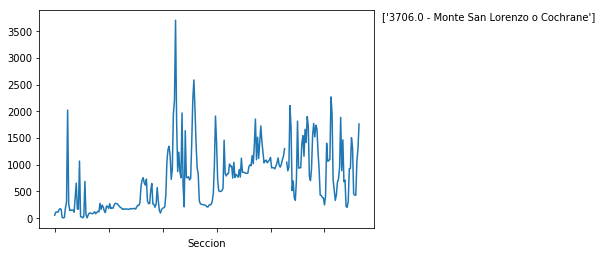

In [33]:
import matplotlib.pyplot as plt #biblioteca para hacer graficos

# Crea un grafico
hitosChile['CotaSueloAprox'].plot()

# Valor maximo de la cota
MaxValue = hitosChile['CotaSueloAprox'].max()

# Hito asociado a la cota maxima
MaxName = hitosChile['Hito'][hitosChile['CotaSueloAprox'] == hitosChile['CotaSueloAprox'].max()].values

# Texto para mostrar en el grafico
Text = str(MaxValue) + " - " + MaxName

# Agrega el texto al grafico
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("El hito mas alto")
hitosChile[hitosChile['CotaSueloAprox'] == hitosChile['CotaSueloAprox'].max()]
#Sorted.head(1) can also be used

Region
Aysén del General Carlos Ibañez del Campo.    AxesSubplot(0.125,0.125;0.775x0.755)
Aysén del General Carlos Ibáñez del Campo     AxesSubplot(0.125,0.125;0.775x0.755)
Aysén del General Carlos Ibáñez del Campo.    AxesSubplot(0.125,0.125;0.775x0.755)
Aysén del general Carlos Ibañez del Campo.    AxesSubplot(0.125,0.125;0.775x0.755)
De Magallanes y Antártica Chilena.            AxesSubplot(0.125,0.125;0.775x0.755)
Región de Los Lagos                           AxesSubplot(0.125,0.125;0.775x0.755)
Name: CotaSueloAprox, dtype: object

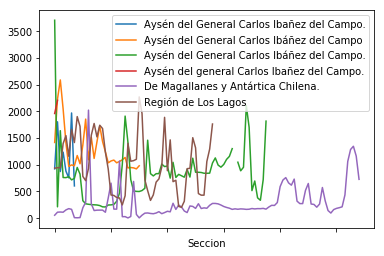

In [32]:
hitosChile.set_index('Seccion', inplace=True)

hitosChile.groupby('Region')['CotaSueloAprox'].plot(legend=True)